In [40]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

In [41]:
file_path = 'Usability_study_data.csv'
data = pd.read_csv(file_path)

In [42]:
data = data.drop(['Timestamp', 'Email Address'], axis=1)

In [43]:
keys = data.columns.tolist()

In [44]:
questions = {}

for key in keys:
    question = (key[:key.find("[")].strip())
    framework = key[key.find("["):].strip()
    if framework in ['[DSPy]','[LMQL]','[MTLLM]']:
        if question not in questions.keys():
            questions[question] = pd.DataFrame()
        if question != 'Would you recommend this framework to others?':
            questions[question][framework] = (((data.map(lambda x: x[0] if isinstance(x, str) else x))[key]).astype(int))

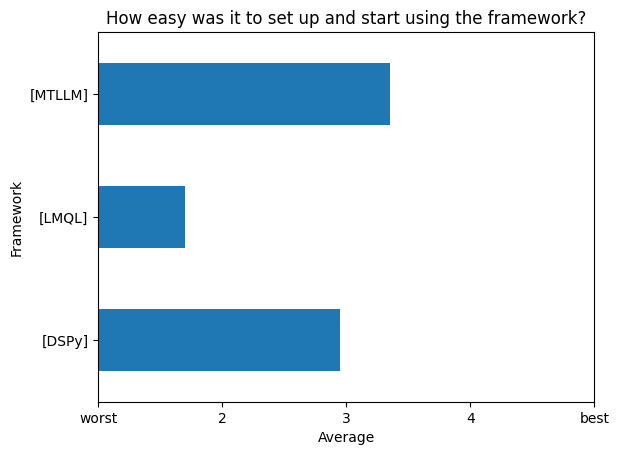

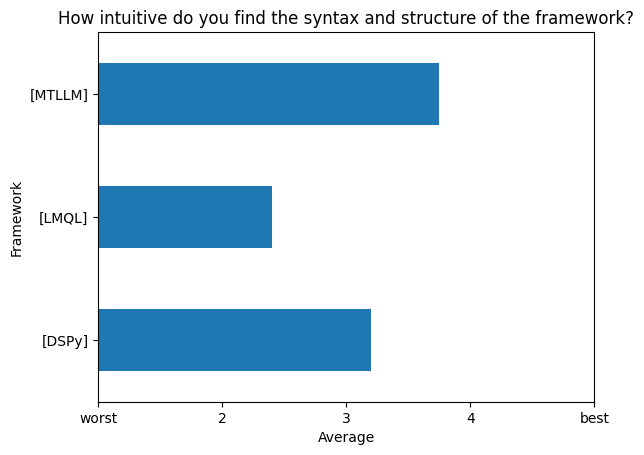

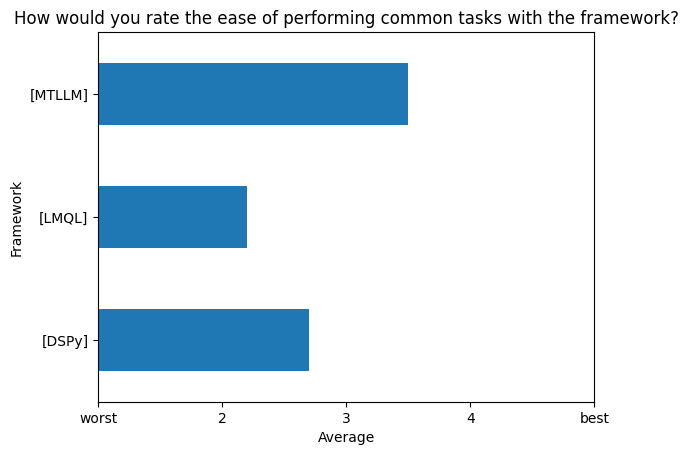

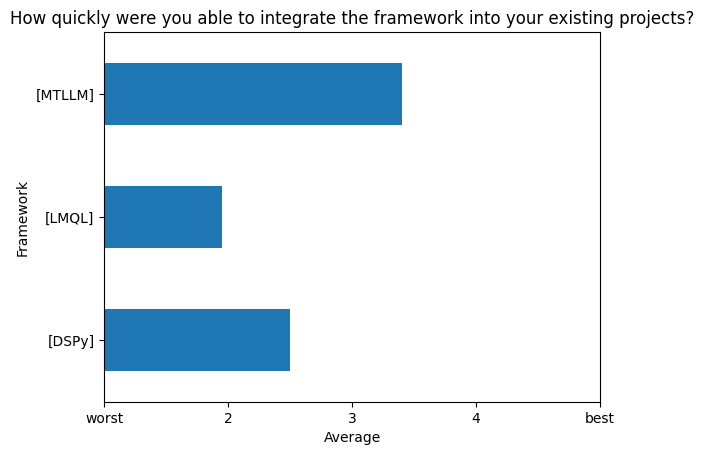

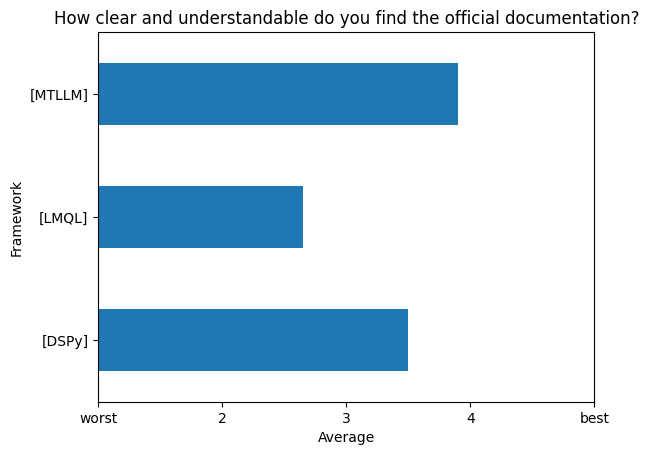

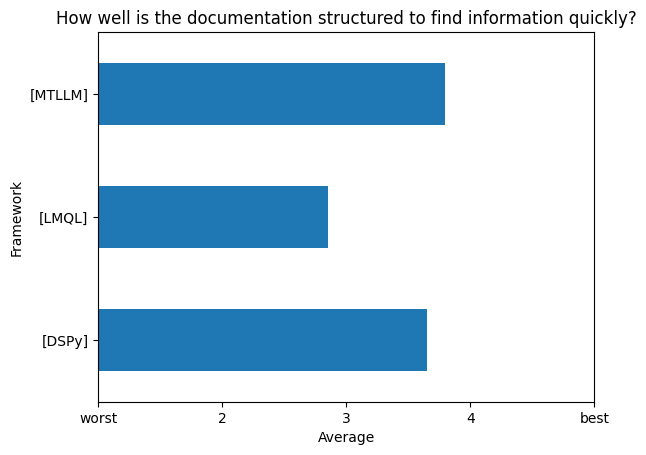

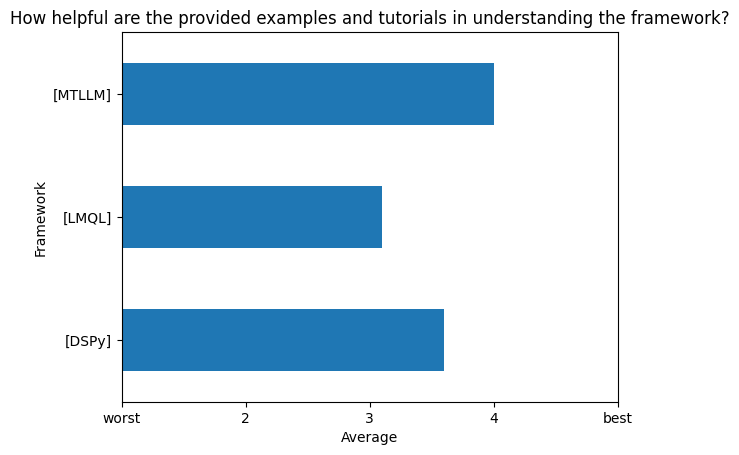

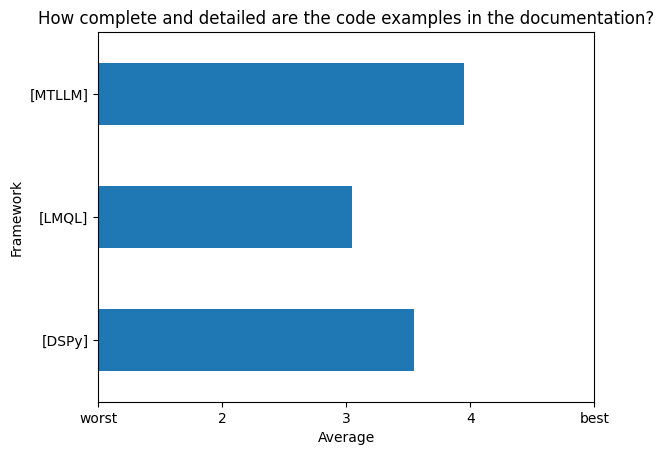

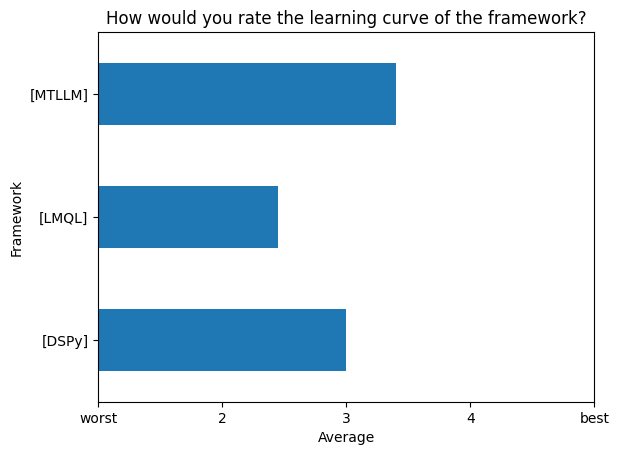

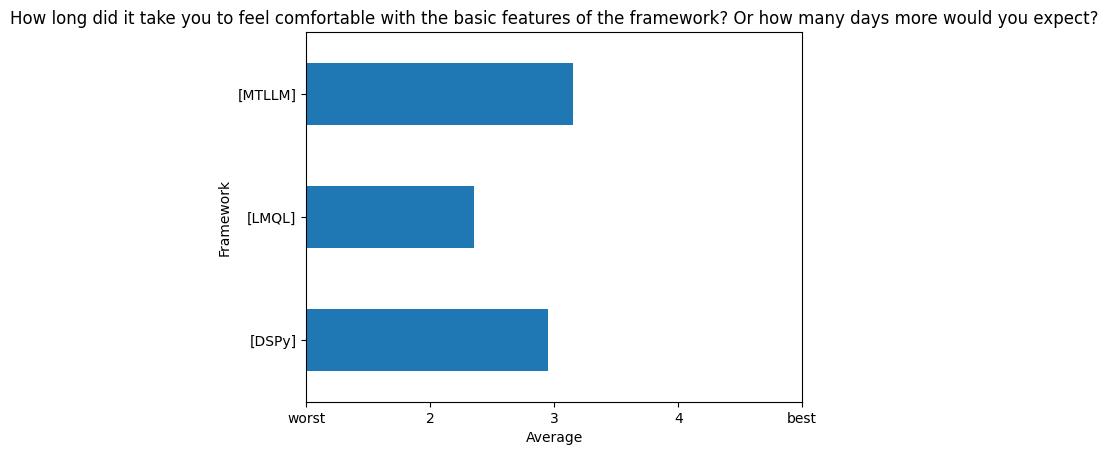

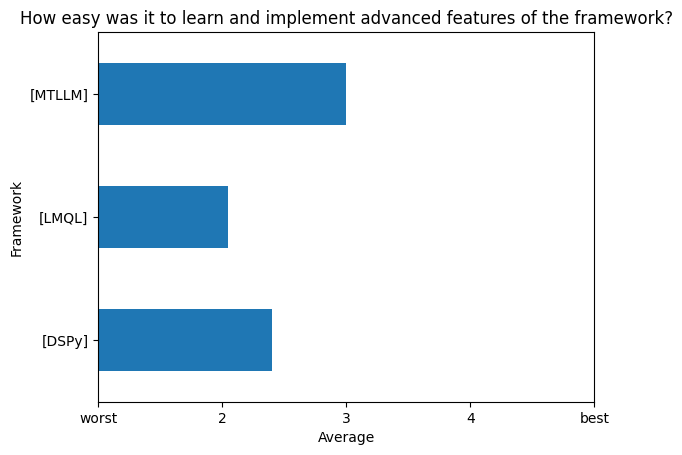

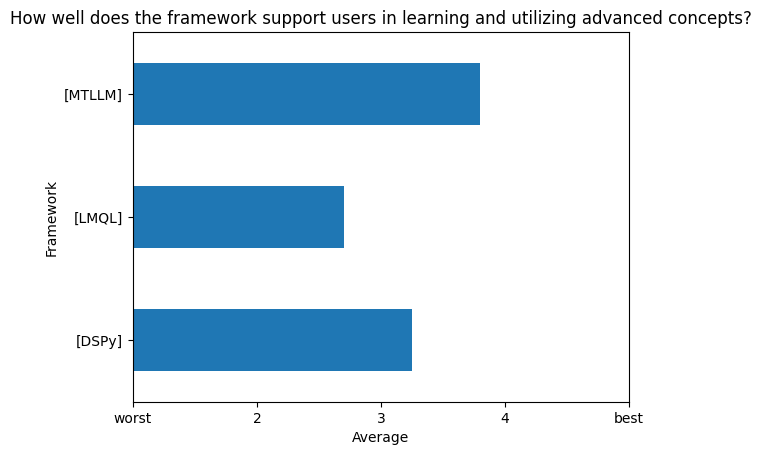

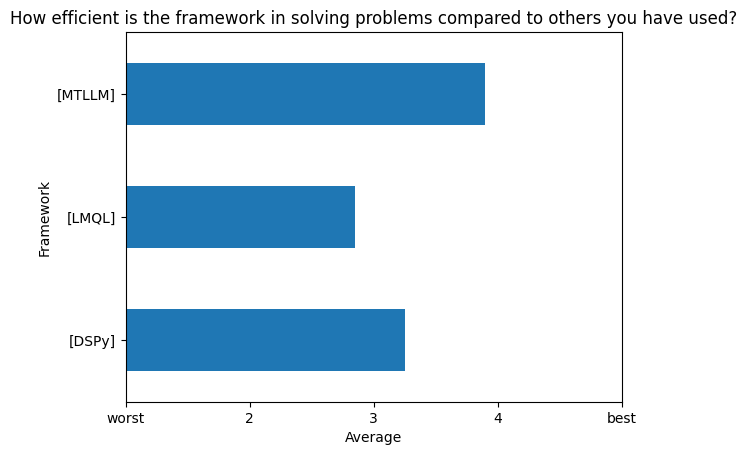

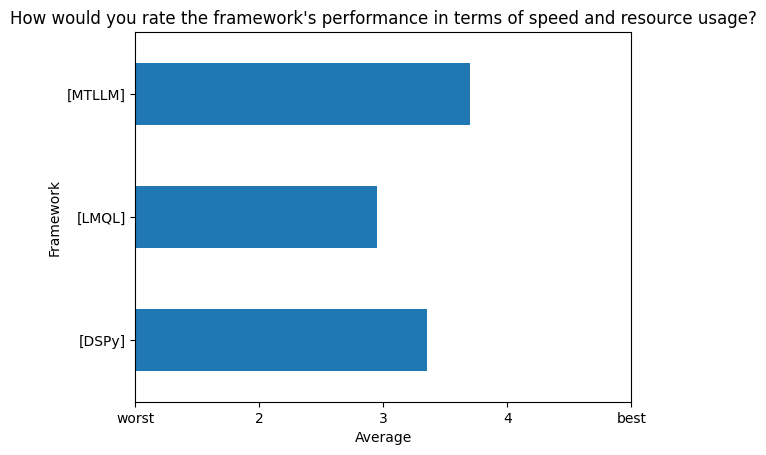

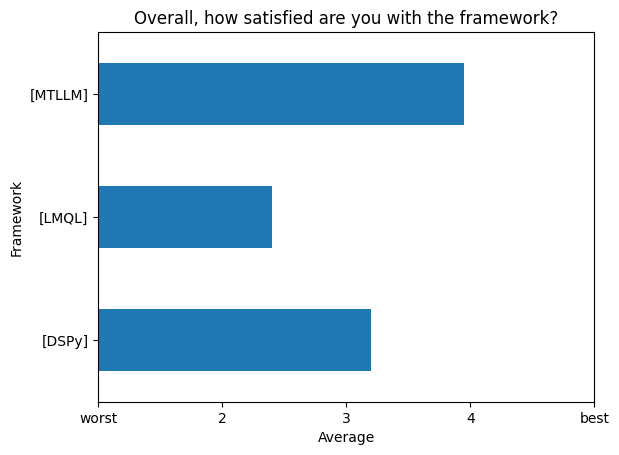

IndexError: index 0 is out of bounds for axis 0 with size 0

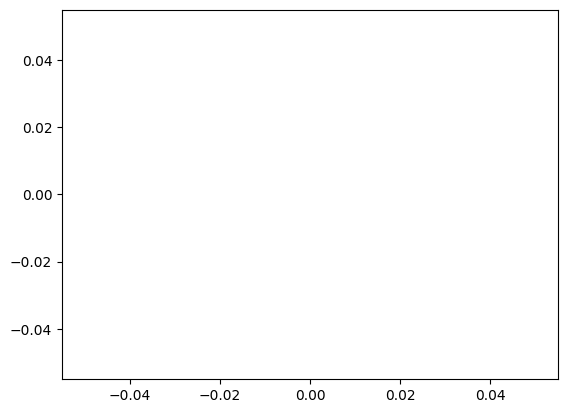

In [50]:
import matplotlib.pyplot as plt

for question, df in questions.items():
    means = df.mean()
    means.plot(kind='barh')
    plt.title(question)
    plt.xlabel('Average')
    plt.ylabel('Framework')
    plt.xlim(1, 5)
    plt.xticks([1, 2, 3, 4, 5], ['worst', 2, 3, 4, 'best'])
    for index, value in enumerate(means):
        plt.text(value, index, f'{value:.2f}', va='center')
    plt.show()